## Oscar Rodriguez
## Victo Alfonso Casas
## Edwin Ernesto Prieto

## 1

In [3]:
#Cargar las Librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# Librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Lectura de datos en Python y Lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [6]:
# Realizamos Lectura de los Datos para el análisis exploratorio

Datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
#Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

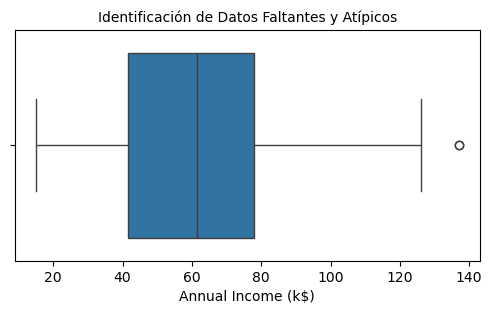

In [13]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2.

In [15]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en CustomerID: ",Datos['CustomerID']. isin([0]).sum( ))
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ",Datos['Spending Score (1-100)'].isin([0]).sum())
print("Cantidad de Registros con cero en Gender: ",Datos['Gender'].isin([0]).sum())

Cantidad de Registros con cero en CustomerID:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Spending Score (1-100):  0
Cantidad de Registros con cero en Gender:  0


In [16]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['CustomerID']=Datos['Age'].replace(0,Datos['Spending Score (1-100)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

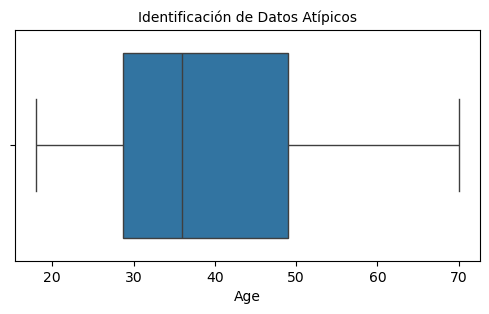

In [17]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

In [19]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo) |(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [20]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [21]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3.

In [25]:
# Filtrar columnas del modelo

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [26]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


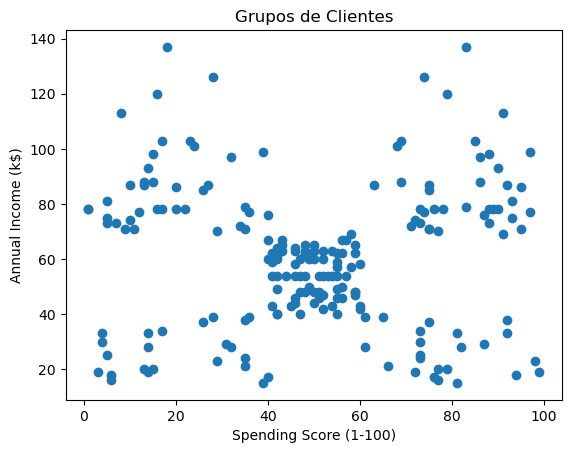

In [27]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Spending Score (1-100)'], Datos['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Grupos de Clientes')
plt.show()

## 4.

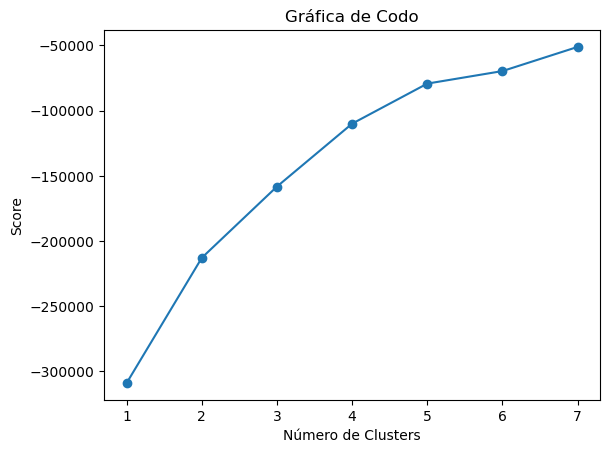

In [28]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [38]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento)

Modelo = KMeans(n_clusters=7, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=7, random_state=0)

In [39]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento
Modelo.labels_
Datos["Grupo"] = Modelo. labels_
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


## 5.

In [40]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan Las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
["Numero de Observaciones", Observaciones],
["Coeficiente Silhouette", sil_score],
["Indice Calinski Harabasz", calinski_score],
["Indice Davies Bouldin", davies_score]
]

# Imprime La tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4432611991151073 |
| Indice Calinski Harabasz | 157.05472568445765 |
|  Indice Davies Bouldin   | 0.7479474861226099 |
+--------------------------+--------------------+


## 6.

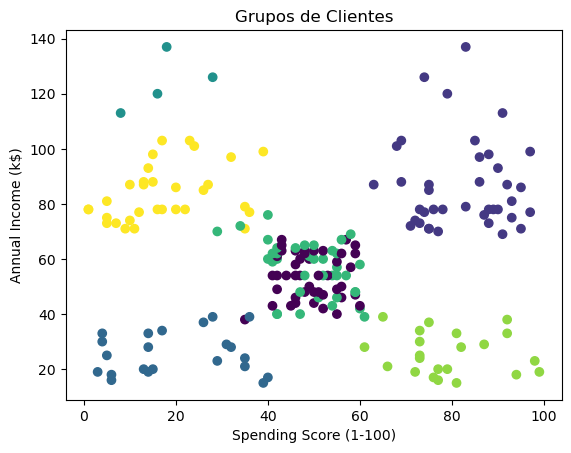

In [42]:
plt.scatter(Datos['Spending Score (1-100)'], Datos['Annual Income (k$)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Grupos de Clientes')
plt.show()

Interpretar, analizar y documentar los resultados obtenidos
Del desempeño del modelo se puede describir:

Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente 0,443, aunque no se acerca a 1, todavía indica una buena cantidad de separación entre los grupos. los grupos son algo distintos, pero puede haber ligeras superposiciones entre ellos.

Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 157.05, que es alta, Los clusters están bien separados: Existe una gran distancia entre los centroides de los diferentes grupos.Los puntos dentro de cada cluster están relativamente cercanos: Los datos dentro de cada grupo son bastante homogéneos.

Indice Davies Bouldin: La puntuación de Davies Bouldin de 0,747 es una puntuación alta, lo que indica qu los clusters pueden no estar tan bien separados como se esperaría. Algunos clusters podrían ser muy similares entre sí y podría haber una sobre-agrupación de los datos.